Project 2 - Part 2
 
Erlangga Febrianno

In [3]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Mount Data
filename = '/content/drive/MyDrive/Coding Dojo/Project 2/Company Bankrucptcy Prediction .csv'

In [2]:
#Read and Explore The Data

df=pd.read_csv(filename)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Identified Missing Values and Duplicates Data

In [3]:
#Find Missing Values
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [4]:
#Find Duplicate Data
df.duplicated().sum()

0

Identified and corrected inconsistencies

In [5]:
#Checking data consistency in each column
df.groupby('Bankrupt?').count()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,,,,,,,,,,,,,,,,,,,,,
0,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599,...,6599,6599,6599,6599,6599,6599,6599,6599,6599,6599
1,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220


In [6]:
#Dropping Columns with the same ratios.
#There are ratios that has the same meaning in this data set which is Current Liabilities/Liability and  Current Liability to Liability

#Judgement one of the colums will be deleted
df = df.drop([' Current Liability to Equity', ' Current Liability to Liability'], axis = 1 )


Produced univariate visuals for the target and all features

The visual that I create is not for all the features. Based on my judgement on the company financial ratios, there are some features that I think is very important such as:
1. Gross Profit to Sales
2. ROA Before Interest and Depreciation after tax
3. Cash Flow to Liability
4. Cash Flow Rate
5. Cash Turnover Rate

From this features we can get information about how the company perform in getting Profit and the profitability performance and also how the company cash flow to manage debt and operational activity.

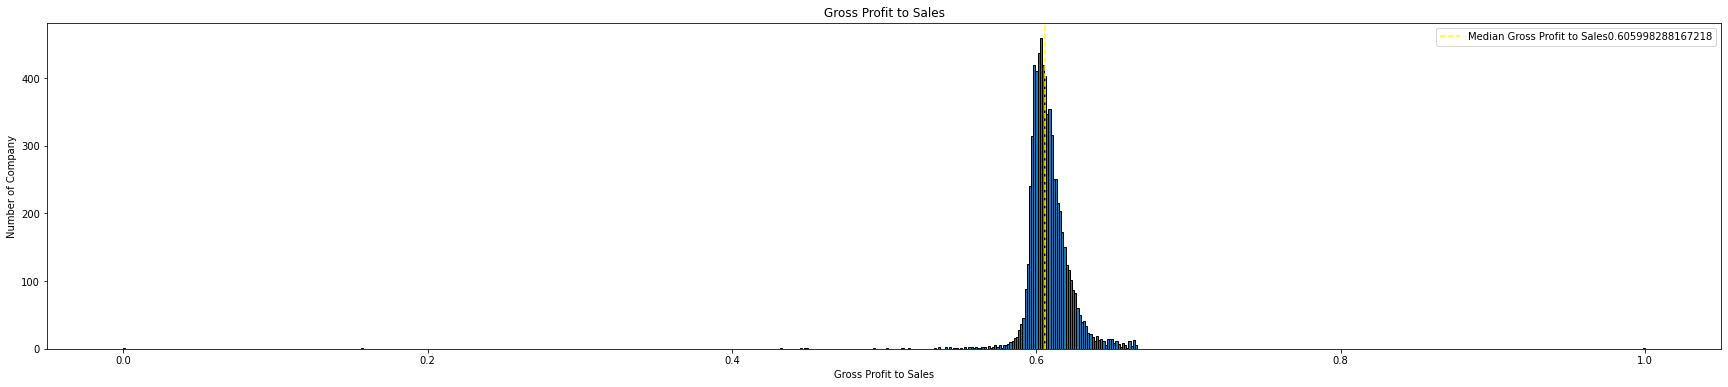

In [7]:
#Create Histogram for Gross Profit to Sales

plt.figure(figsize=(30,6))
plt.hist(df[' Gross Profit to Sales'], bins='auto', edgecolor='black')
plt.xlabel('Gross Profit to Sales')
plt.ylabel('Number of Company')
plt.title('Gross Profit to Sales')
plt.axvline(df[' Gross Profit to Sales'].median(), color='yellow', linestyle='--',
            label=f"Median Gross Profit to Sales{df[' Gross Profit to Sales'].median()}")

plt.legend();

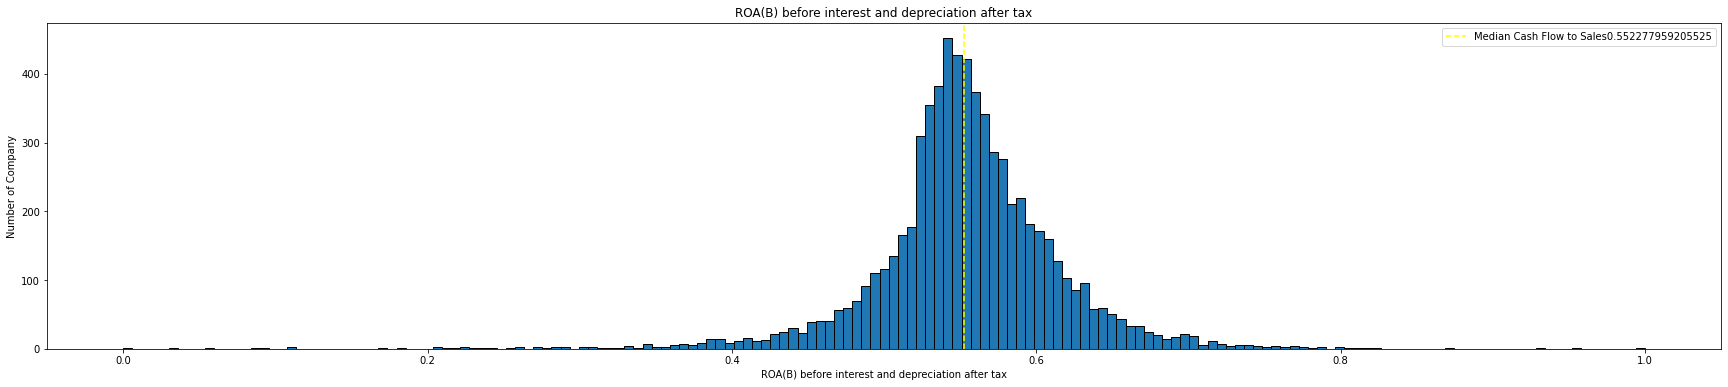

In [8]:
#Create Histogram for ROA Before Interest and Depreciation after tax

plt.figure(figsize=(30,6))
plt.hist(df[' ROA(B) before interest and depreciation after tax'], bins='auto', edgecolor='black')
plt.xlabel('ROA(B) before interest and depreciation after tax')
plt.ylabel('Number of Company')
plt.title('ROA(B) before interest and depreciation after tax')
plt.axvline(df[' ROA(B) before interest and depreciation after tax'].median(), color='yellow', linestyle='--',
            label=f"Median Cash Flow to Sales{df[' ROA(B) before interest and depreciation after tax'].median()}")

plt.legend();

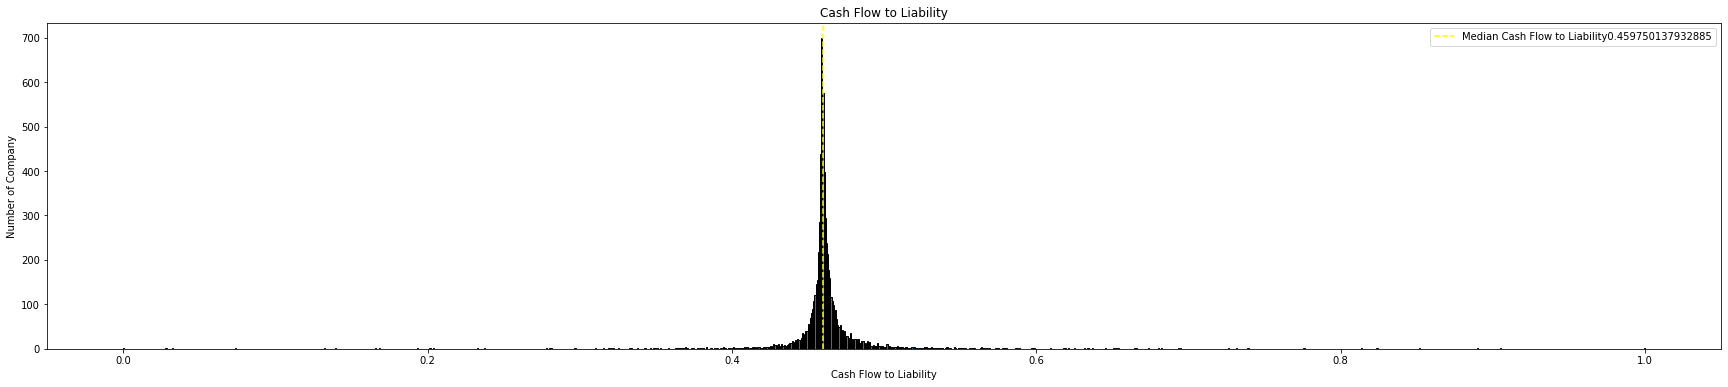

In [9]:
#Create Histogram for Cash Flow to Liability

plt.figure(figsize=(30,6))
plt.hist(df[' Cash Flow to Liability'], bins='auto', edgecolor='black')
plt.xlabel('Cash Flow to Liability')
plt.ylabel('Number of Company')
plt.title('Cash Flow to Liability')
plt.axvline(df[' Cash Flow to Liability'].median(), color='yellow', linestyle='--',
            label=f"Median Cash Flow to Liability{df[' Cash Flow to Liability'].median()}")

plt.legend();

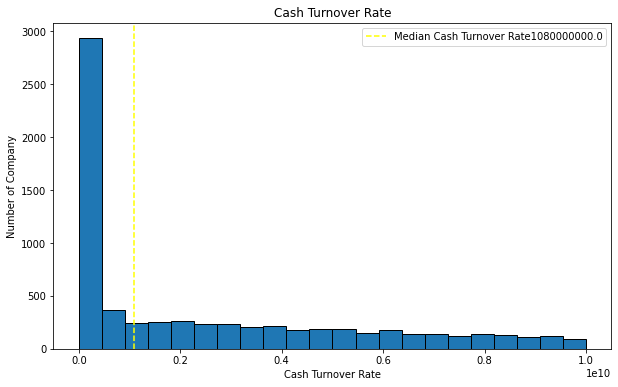

In [10]:
#Create Histogram for Cash Turnover Rate

plt.figure(figsize=(10,6))
plt.hist(df[' Cash Turnover Rate'], bins='auto', edgecolor='black')
plt.xlabel('Cash Turnover Rate')
plt.ylabel('Number of Company')
plt.title('Cash Turnover Rate')
plt.axvline(df[' Cash Turnover Rate'].median(), color='yellow', linestyle='--',
            label=f"Median Cash Turnover Rate{df[' Cash Turnover Rate'].median()}")

plt.legend();

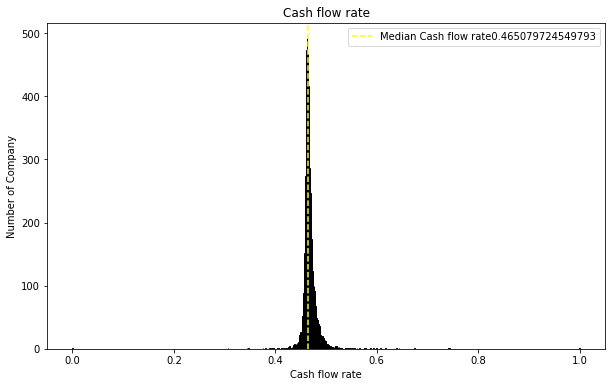

In [11]:
#Create Histogram for Cash flow rate

plt.figure(figsize=(10,6))
plt.hist(df[' Cash flow rate'], bins='auto', edgecolor='black')
plt.xlabel('Cash flow rate')
plt.ylabel('Number of Company')
plt.title('Cash flow rate')
plt.axvline(df[' Cash flow rate'].median(), color='yellow', linestyle='--',
            label=f"Median Cash flow rate{df[' Cash flow rate'].median()}")

plt.legend();

In [ ]:
#Create Histogram for Quick Ratio

plt.figure(figsize=(10,6))
plt.hist(df[' Quick Ratio'], bins='auto', edgecolor='black')
plt.xlabel('Quick Ratio')
plt.ylabel('Number of Company')
plt.title('Quick Ratio')
plt.axvline(df[' Quick Ratio'].median(), color='yellow', linestyle='--',
            label=f"Median Quick Ratio{df[' Quick Ratio'].median()}")

plt.legend();

Identified outliers

In [ ]:
#Identified Outliers
df.describe()

Based on the data description, there might be outliers data on every columns.
From the table above the max number is greater than 3rd quartile in almost every columns.

Project 2 - Part 3


#Identifying any moderate or strong correlations between your target and your features and/or between one feature and another

In [ ]:
#Calculate the correlation between features
df.corr()
df1=df.corr().round(2)
df1.head(96)

plt.figure(figsize = (100,100))
sns.heatmap(df1, linewidth=1, annot = True, annot_kws={"size":12})
plt.title ('Company Financial Ratios')
plt.show()


Explanation based on the correlation calculation between features

Financial ratios is calculated base on the items in Balance Sheet, Income Statement and Cash Flow Statement.
Some features that use Profit to calculate the ratios such as Return on Assets, Earning per Share (EPS), Retained Earnings and Operating profit will have a strong correlation, such as:
ROA and Net Value per Share, ROA, and operating Profit per Share.

The correlation between the target values and all other features considered very low. The highest correlation is between the target value and Debt Ratio% (0.25), Borrowing dependecy(0.18), Current liability to assets (0.17), and liability to equity (0.17)

In [ ]:
df2 = df.groupby('Bankrupt?').mean()
df2

In [ ]:
# Visualize means values based on Target Values
df2.plot(subplots=True, kind='bar', figsize=(6,300))
plt.tight_layout()

Based on the visualizations above there are some key point that i want to explain about the bankruptcy prediction:
1. If we see the profitability ratios, such ROA before interest and depreciation, ROA after tax,  it shows that the return on Assets for the company that going to bankrupt has lower number. It means that the company can not utilize their assets as good as the company which is survive.
2. If we see the performance based on how the company manage their expense, we can see that the company that going to bankrupt has higher total expense/asset ratio.
3. The company whichs is going to bankrupt actually has a good performance in collecting their cash. We can see that from the account receivable ratio and the average collecting days shows lower number than the other.
4. The company that is going to bankrupt has a high number of debt. We can see that from the debt ratio.

From that key point, my initial assumptions why a company going to bankruptcy are because of how the company handle their expense and debt.

In [5]:
#Copy the Data
ml_df = pd.read_csv(filename)

ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Split Train & Test Data

In [6]:
X=ml_df.drop(columns='Bankrupt?')
y=ml_df['Bankrupt?']


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

First Model:
Random Forest Classifier

In [8]:
#Random Forest
rf = RandomForestClassifier(random_state = 42)

#Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
#Make Predictions
rf_pred = rf.predict(X_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
#Evaluate the Model
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(f'RF Train Data Score {rf_train_score}')
print(f'RF Test Data Score {rf_test_score}')

RF Train Data Score 1.0
RF Test Data Score 0.9712609970674487


Second Model : K-Nearest Neighbours

In [13]:
#K-Nearest Neighbour
knn = KNeighborsClassifier(n_neighbors=1)

#Fit The Model
knn.fit(X_train, y_train)

#Predict the results
knn_pred = knn.predict(X_test)

In [15]:
#Evaluate The Score
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)
print(f'KNN Train Data Score {knn_train_score}')
print(f'KNN Test Data Score {knn_test_score}')

KNN Train Data Score 1.0
KNN Test Data Score 0.9483870967741935
